In [1]:
from sqlalchemy import create_engine
import pandas as pd
import sqlalchemy
import pprint
import psycopg2
import matplotlib.pyplot as plt
from config import user, pw



In [4]:
# Create an engine
engine = create_engine(f'postgresql+psycopg2://{user}:{pw}@/HW_SQL_Challange')
connection = engine.connect()



In [5]:
# read salaries table 
salaries = pd.read_sql('select emp_no, salary from salaries', connection)
salaries.head(10)

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
5,10006,40000
6,10007,56724
7,10008,46671
8,10009,60929
9,10010,72488


In [6]:
#read titles table
titles = pd.read_sql('select emp_no, title from titles', connection)
titles.head(10)

,emp_no,title
0,10001,Senior Engineer
1,10002,Staff
2,10003,Senior Engineer
3,10004,Engineer
4,10004,Senior Engineer
5,10005,Senior Staff
6,10005,Staff
7,10006,Senior Engineer
8,10007,Senior Staff
9,10007,Staff


In [7]:
# merge titles and salaries tables
employee_salaries_df = titles.merge(salaries, on='emp_no')
employee_salaries_df.head()

,emp_no,title,salary
0,10001,Senior Engineer,60117
1,10002,Staff,65828
2,10003,Senior Engineer,40006
3,10004,Engineer,40054
4,10004,Senior Engineer,40054


In [8]:
# group all titles and get the mean
average_Emp_Salary = employee_salaries_df.groupby('title')['salary'].mean().round(0)
average_Emp_Salary


title
Assistant Engineer    48493.0
Engineer              48540.0
Manager               51531.0
Senior Engineer       48507.0
Senior Staff          58503.0
Staff                 58465.0
Technique Leader      48581.0
Name: salary, dtype: float64

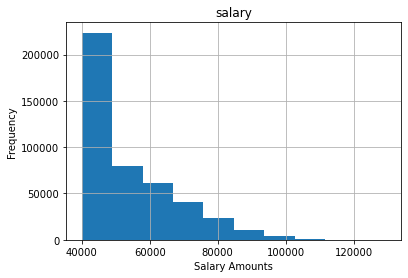

In [9]:
employee_salaries_df.hist(column='salary')
plt.xlabel('Salary Amounts')
plt.ylabel('Frequency')
plt.tight_layout
plt.show()

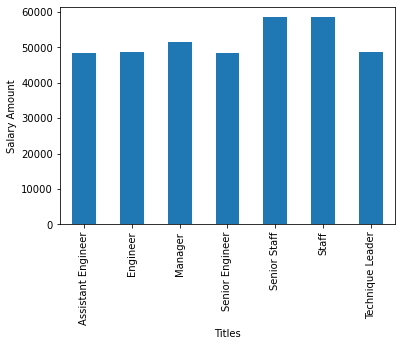

In [10]:
#created bar chart of average employee salary 
average_Emp_Salary.plot.bar()
plt.ylabel('Salary Amount')
plt.xlabel('Titles')
plt.show()

In [11]:
# wanted to see what the boss was talking about
your_id = employee_salaries_df[employee_salaries_df['emp_no']=='499942']
print(your_id)

        emp_no             title  salary
443224  499942  Technique Leader   40000
